#Modelo K-vecinos

Modelo K-vecinos

# Importar las bibliotecas

In [2]:
import joblib

In [6]:
import numpy as np
import pandas as pd
from scipy.io import arff
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import os

# Cargar e importar los datos

In [7]:
data_arroz = arff.loadarff(r'C:\Users\flor_\Documents\arroz_proyecto_final_ML\data\raw\Rice_Cammeo_Osmancik.arff')
df = pd.DataFrame(data_arroz[0])
print(df)

         Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0     15231.0  525.578979         229.749878          85.093788      0.928882   
1     14656.0  494.311005         206.020065          91.730972      0.895405   
2     14634.0  501.122009         214.106781          87.768288      0.912118   
3     13176.0  458.342987         193.337387          87.448395      0.891861   
4     14688.0  507.166992         211.743378          89.312454      0.906691   
...       ...         ...                ...                ...           ...   
3805  11441.0  415.858002         170.486771          85.756592      0.864280   
3806  11625.0  421.390015         167.714798          89.462570      0.845850   
3807  12437.0  442.498993         183.572922          86.801979      0.881144   
3808   9882.0  392.296997         161.193985          78.210480      0.874406   
3809  11434.0  404.709991         161.079269          90.868195      0.825692   

      Convex_Area    Extent

In [8]:
df.head(100)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,b'Cammeo'
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,b'Cammeo'
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,b'Cammeo'
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,b'Cammeo'
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,b'Cammeo'
...,...,...,...,...,...,...,...,...
95,13524.0,487.468994,208.153427,83.614265,0.915773,13830.0,0.637925,b'Cammeo'
96,13677.0,494.635010,219.599564,79.631660,0.931936,13936.0,0.532096,b'Cammeo'
97,12921.0,476.746002,206.222626,80.403679,0.920862,13218.0,0.546921,b'Cammeo'
98,13251.0,460.532013,190.916306,88.997559,0.884700,13528.0,0.749915,b'Cammeo'


In [9]:
df.describe

<bound method NDFrame.describe of          Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0     15231.0  525.578979         229.749878          85.093788      0.928882   
1     14656.0  494.311005         206.020065          91.730972      0.895405   
2     14634.0  501.122009         214.106781          87.768288      0.912118   
3     13176.0  458.342987         193.337387          87.448395      0.891861   
4     14688.0  507.166992         211.743378          89.312454      0.906691   
...       ...         ...                ...                ...           ...   
3805  11441.0  415.858002         170.486771          85.756592      0.864280   
3806  11625.0  421.390015         167.714798          89.462570      0.845850   
3807  12437.0  442.498993         183.572922          86.801979      0.881144   
3808   9882.0  392.296997         161.193985          78.210480      0.874406   
3809  11434.0  404.709991         161.079269          90.868195      0.8256

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   float64
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   float64
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(7), object(1)
memory usage: 238.3+ KB


# Limpieza datos (columna Class)

In [11]:
# Verificar los valores únicos en la columna 'Class'
print("Valores únicos antes de la limpieza:")
print(df['Class'].unique())

Valores únicos antes de la limpieza:
[b'Cammeo' b'Osmancik']


In [12]:
# Convertir los valores de bytes a strings y eliminar espacios en blanco
df['Class'] = df['Class'].apply(lambda x: x.decode('utf-8').strip())

In [13]:
# Convertir la columna 'Class' al tipo categórico
df['Class'] = df['Class'].astype('category')

In [14]:
# Verificar los valores únicos en la columna 'Class' después de la limpieza
print("Valores únicos después de la limpieza:")
print(df['Class'].unique())

Valores únicos después de la limpieza:
['Cammeo', 'Osmancik']
Categories (2, object): ['Cammeo', 'Osmancik']


In [15]:
# Visualizar las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
print(df.head())

# Mostrar la información del DataFrame para verificar los tipos de datos
print("Información del DataFrame:")
print(df.info())

Primeras filas del DataFrame:
      Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0  15231.0  525.578979         229.749878          85.093788      0.928882   
1  14656.0  494.311005         206.020065          91.730972      0.895405   
2  14634.0  501.122009         214.106781          87.768288      0.912118   
3  13176.0  458.342987         193.337387          87.448395      0.891861   
4  14688.0  507.166992         211.743378          89.312454      0.906691   

   Convex_Area    Extent   Class  
0      15617.0  0.572896  Cammeo  
1      15072.0  0.615436  Cammeo  
2      14954.0  0.693259  Cammeo  
3      13368.0  0.640669  Cammeo  
4      15262.0  0.646024  Cammeo  
Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Area               3810 non-null   float64 
 1   Perime

# Convertir datos categoricos a numericos


In [16]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["Class"] = encoder.fit_transform(df["Class"])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   float64
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   float64
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 223.4 KB


In [18]:
df.head(10)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,0
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,0
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,0
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,0
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,0
5,13479.0,477.015991,200.053055,86.650291,0.901328,13786.0,0.657897,0
6,15757.0,509.281006,207.296677,98.336136,0.880323,16150.0,0.589708,0
7,16405.0,526.570007,221.612518,95.436707,0.902521,16837.0,0.658888,0
8,14534.0,483.640991,196.650818,95.050682,0.875429,14932.0,0.649651,0
9,13485.0,471.570007,198.272644,87.727287,0.896789,13734.0,0.572320,0


In [19]:
#Agrupamos por la columna 'Class' y calculamos la media de 'Area'
area_mean_by_class = df.groupby('Class')['Area'].mean()

print(area_mean_by_class)

Class
0    14162.892025
1    11549.783486
Name: Area, dtype: float64


In [22]:
# Guardar el DataFrame procesado en un archivo CSV
#df.to_csv(r'C:\Users\flor_\Documents\arroz_proyecto_final_ML\data\raw\Rice_Cammeo_Osmancik.csv', index=False)

# Visualizaciones


In [20]:
#Total filas y columnas 
df.shape

(3810, 8)

In [21]:
#Estadistica descriptiva
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934,0.572178
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239,0.494828
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413,0.000000
25%,11370.500000,426.144753,174.353855,82.731695,0.872402,11626.250000,0.598862,0.000000
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361,1.000000
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562,1.000000
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050,1.000000


In [22]:
df.describe().T.style.background_gradient(axis=0)


,count,mean,std,min,25%,50%,75%,max
Area,3810.000000,12667.727559,1732.367706,7551.000000,11370.500000,12421.500000,13950.000000,18913.000000
Perimeter,3810.000000,454.239180,35.597081,359.100006,426.144753,448.852493,483.683746,548.445984
Major_Axis_Length,3810.000000,188.776222,17.448679,145.264465,174.353855,185.810059,203.550438,239.010498
Minor_Axis_Length,3810.000000,86.313750,5.729817,59.532406,82.731695,86.434647,90.143677,107.542450
Eccentricity,3810.000000,0.886871,0.020818,0.777233,0.872402,0.889050,0.902588,0.948007
Convex_Area,3810.000000,12952.496850,1776.972042,7723.000000,11626.250000,12706.500000,14284.000000,19099.000000
Extent,3810.000000,0.661934,0.077239,0.497413,0.598862,0.645361,0.726562,0.861050
Class,3810.000000,0.572178,0.494828,0.000000,0.000000,1.000000,1.000000,1.000000


# Podemos visualizar respecto a las clases de arroz existentes en el estudio

c:\Users\flor_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\flor_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\flor_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\flor_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

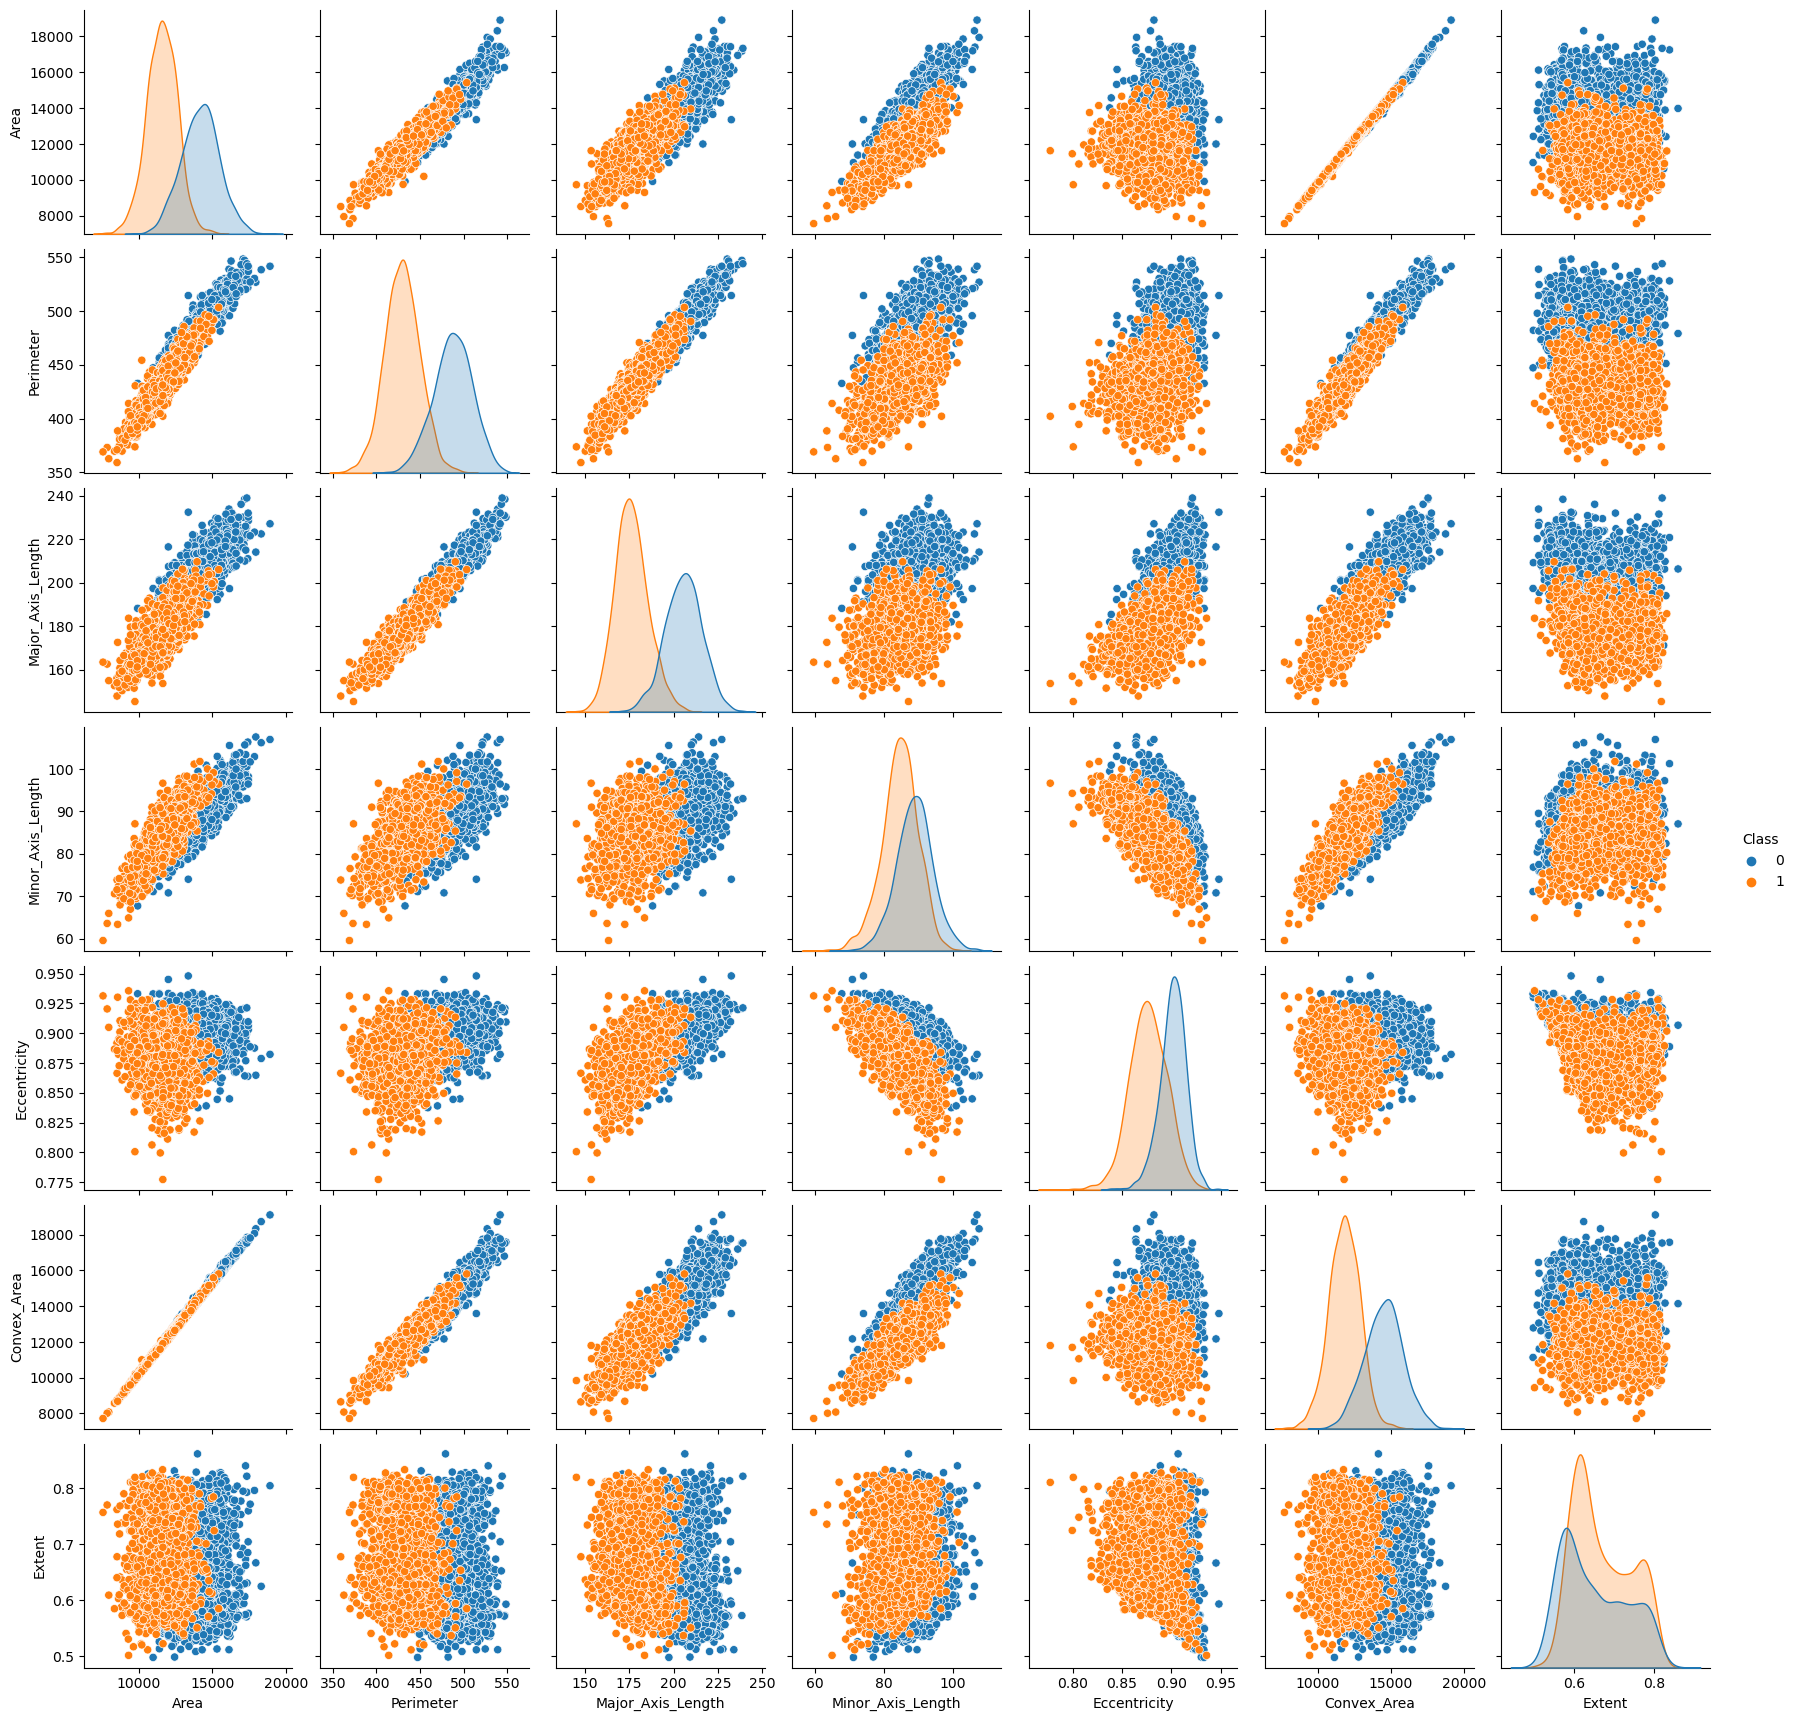

In [24]:
import seaborn as sns

sns.pairplot(df, hue="Class")

# Preparar datos para el Modelo

In [25]:
features = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Convex_Area', 'Extent']

X = df[features]
y = df['Class']

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #fit determino la media y la desviacion standar

In [28]:
X_scaled

array([[ 1.47982953,  2.0043543 ,  2.34854657, ...,  2.01833745,
         1.49965944, -1.15292093],
       [ 1.14787029,  1.12585309,  0.98839042, ...,  0.41001816,
         1.19291767, -0.60207877],
       [ 1.13516924,  1.31721425,  1.45190846, ...,  1.2129565 ,
         1.12650386,  0.405611  ],
       ...,
       [-0.13320373, -0.32985087, -0.29824512, ..., -0.27509915,
        -0.17306812, -0.45573108],
       [-1.60825742, -1.74032002, -1.58097116, ..., -0.59882134,
        -1.60715621, -0.03716757],
       [-0.71225612, -1.39156605, -1.58754648, ..., -2.93916013,
        -0.76628981,  1.82594692]])

In [30]:
import pandas as pd

pd.DataFrame(X_scaled, columns=X.columns).describe() #uso el describe para comprobar la desviacion standar se encuentre en 1 y la media en 0

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3.810000e+03,3810.000000,3.810000e+03,3.810000e+03,3.810000e+03,3.810000e+03
mean,0.000000,-1.193563e-16,0.000000,-5.371032e-16,5.669422e-16,-4.774250e-16,-4.923446e-16
std,1.000131,1.000131e+00,1.000131,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00
min,-2.953991,-2.673019e+00,-2.494027,-4.674645e+00,-5.267280e+00,-2.943312e+00,-2.130313e+00
25%,-0.748916,-7.893376e-01,-0.826668,-6.252425e-01,-6.951263e-01,-7.464501e-01,-8.166890e-01
50%,-0.142152,-1.513437e-01,-0.170016,2.110226e-02,1.047129e-01,-1.384541e-01,-2.145916e-01
75%,0.740282,8.272709e-01,0.846835,6.685081e-01,7.551068e-01,7.494085e-01,8.368337e-01
max,3.605523,2.646823e+00,2.879351,3.705439e+00,2.937147e+00,3.459430e+00,2.578260e+00


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) #test_size=0.25 es un valor arbitrario, EN EL VIDEO UTILIZA 0.16

print(X_train.shape)
print(X_test.shape)

(2857, 7)
(953, 7)


In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [34]:
knn.score(X_train, y_train)

0.9142457122856142

In [35]:
knn.score(X_test, y_test)

0.8898216159496327

In [36]:
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    print('K=',k)
    print("Train: ", knn.score(X_train, y_train))
    print("Test ", knn.score(X_test, y_test))
    print('-'*50)

K= 1
Train:  1.0
Test  0.8730325288562435
--------------------------------------------------
K= 2
Train:  0.9345467273363668
Test  0.8625393494228751
--------------------------------------------------
K= 3
Train:  0.9324466223311165
Test  0.8929695697796433
--------------------------------------------------
K= 4
Train:  0.9184459222961148
Test  0.8845750262329486
--------------------------------------------------
K= 5
Train:  0.9142457122856142
Test  0.8898216159496327
--------------------------------------------------
K= 6
Train:  0.9096954847742387
Test  0.8824763903462749
--------------------------------------------------
K= 7
Train:  0.9033951697584879
Test  0.8835257082896117
--------------------------------------------------
K= 8
Train:  0.904095204760238
Test  0.881427072402938
--------------------------------------------------
K= 9
Train:  0.8988449422471123
Test  0.8845750262329486
--------------------------------------------------
K= 10
Train:  0.8956947847392369
Test  0.8845

1. **`K=1`:**
   - **Train:** 100% (1.0) → El modelo memoriza perfectamente los datos de entrenamiento, lo cual es típico cuando `k=1`.
   - **Test:** 87.30% → Hay una diferencia significativa entre la precisión en el entrenamiento y la prueba, lo que sugiere sobreajuste (el modelo se ajusta demasiado a los datos de entrenamiento y no generaliza bien).

2. **`K=2` a `K=5`:**
   - **Train:** La precisión disminuye ligeramente a medida que aumenta `k`, pero aún es bastante alta.
   - **Test:** La precisión fluctúa, con un pico notable en `K=3` (89.30%) y un valor decente en `K=5` (88.98%). Este rango de `k` muestra un buen equilibrio, con `K=3` siendo el más prometedor hasta este punto.

3. **`K=6` a `K=10`:**
   - **Train:** La precisión sigue disminuyendo lentamente, lo que es esperado ya que el modelo se vuelve más general a medida que aumenta `k`.
   - **Test:** La precisión se mantiene estable alrededor de 88-89%, con valores de `K=9` y `K=10` dando buenos resultados. Esto sugiere que en este rango, el modelo está generalizando bien.

4. **`K=11` a `K=19`:**
   - **Train:** La precisión sigue disminuyendo ligeramente.
   - **Test:** La precisión se estabiliza en torno al 88-89%. Aunque hay pequeñas variaciones, los resultados son consistentes, indicando que a medida que `k` aumenta, el modelo se vuelve más robusto frente al ruido y a posibles outliers.

### Conclusiones:

- **Sobreajuste en `K=1`:** El sobreajuste es evidente cuando `k=1`, donde el modelo tiene un rendimiento perfecto en el entrenamiento pero no generaliza tan bien en la prueba.

- **Mejor valor de `k`:** 
  - **`K=3`** es el valor que maximiza la precisión en el conjunto de prueba (89.30%) mientras mantiene una precisión de entrenamiento alta, lo que sugiere un buen equilibrio entre ajuste y generalización.
  - **`K=5`** y **`K=9-10`** también son buenos candidatos, con precisiones de prueba similares y una menor tendencia al sobreajuste en comparación con `K=1`.

- **Tendencia General:** A medida que `k` aumenta, el modelo tiende a ser más estable y menos propenso a sobreajustarse, pero con una ligera pérdida en precisión, lo cual es esperado.

### Recomendación:

**`K=3` o `K=5`** parecen ser los mejores valores de `k` para este conjunto de datos, ya que ofrecen un buen equilibrio entre precisión y generalización. Sin embargo, si prefieres un modelo más robusto frente al ruido con solo una pequeña pérdida en precisión, podrías considerar valores entre **`K=9` y `K=10`**. 

Puedes elegir el valor exacto dependiendo de tus prioridades: si buscas maximizar la precisión en la prueba, `K=3` es una excelente opción; si buscas mayor estabilidad y robustez, valores más altos como `K=9` o `K=10` podrían ser preferibles.

In [37]:
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       430
           1       0.87      0.92      0.90       523

    accuracy                           0.88       953
   macro avg       0.89      0.88      0.88       953
weighted avg       0.89      0.88      0.88       953



MATRIZ DE CONFUSION

In [38]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, knn.predict(X_test))

array([[360,  70],
       [ 40, 483]], dtype=int64)

Class 0
Verdaderos Positivos (TP):360. Número de veces que la clase 0 fue correctamente predicha como 0.
Falsos negativos (FN):70. Número de veces que la clase 0 fue incorrectamente predicha como clase 1.

Class 1
Falsos positivos (FP):40. Número de veces que la clase 1 fue incorrectamente predicha como clase 0.
Verdaderos Negativos (TN):483. Número de veces que la clase 1 fue correctamente predicha como 1.

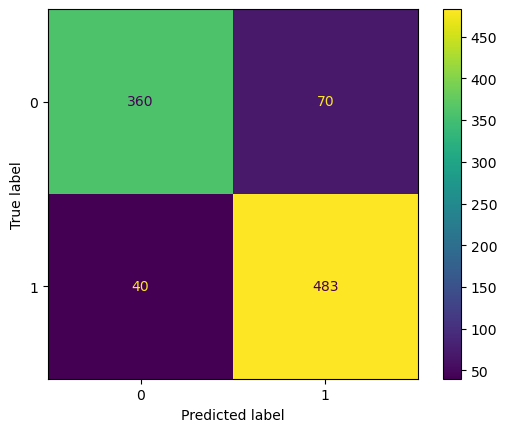

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, knn.predict(X_test), labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1])
disp.plot()
plt.show()

<span style="color:Red">
Guardar el modelo pre-entrenado
</span>

In [42]:
joblib.dump(knn,r'C:\Users\flor_\Documents\arroz_proyecto_final_ML\models\modeloKvecinos.pkl')

['C:\\Users\\flor_\\Documents\\arroz_proyecto_final_ML\\models\\modeloKvecinos.pkl']